In [3]:
!pip install yfinance==0.1.67
!pip install pandas==1.3.3
!mamba install hmtl5lib==1.1 -y
!pip install plotly==5.3.1
!mamba install bs4==4.10.0 -y

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 74.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.co

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import requests
import json
import datetime
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
tesla = yf.Ticker("TSLA")

In [6]:
tesla_info=tesla.info
Dictionary=[tesla_info]
Dictionary

[{'zip': '78725',
  'sector': 'Consumer Cyclical',
  'fullTimeEmployees': 99290,
  'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limited warra

In [7]:
tesla_share_price_data=tesla.history(period="max")
tesla_share_price_data.reset_index(inplace=True)


In [8]:
tesla_share_price_data.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0
5,2010-07-07,3.280,3.326,2.996,3.160,34608500,0,0.0
6,2010-07-08,3.228,3.504,3.114,3.492,38557000,0,0.0
7,2010-07-09,3.516,3.580,3.310,3.480,20253000,0,0.0
8,2010-07-12,3.590,3.614,3.400,3.410,11012500,0,0.0
9,2010-07-13,3.478,3.728,3.380,3.628,13400500,0,0.0


In [58]:
url='https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
url3='https://www.macrotrends.net/stocks/charts/TSLA/tesla/stock-price-history'
webdata = requests.get(url).text
webdata3 = requests.get(url3).text

In [59]:
soup=BeautifulSoup(webdata,"html.parser")
soup3=BeautifulSoup(webdata3,"html.parser")

In [60]:
dft=pd.DataFrame(columns=["Date","Revenue"])
tables = soup.find_all('table')
table_index=0
for index, table in enumerate(tables):
    if ('Tesla Quarterly Revenue' in str(table)):
        table_index=index
for row in tables[table_index].tbody.find_all('tr'):
    Col=row.find_all("td")
    if (Col!=[]):
        date=Col[0].text
        revenue=Col[1].text.replace("$","").replace(",","")
        dft=dft.append({'Date':date, 'Revenue':revenue},
        ignore_index=True)

dft3=pd.DataFrame(columns=["Date","Price"])
tables = soup3.find_all('table')
table_pindex=0
for index, table in enumerate(tables):
    if ('Tesla Quarterly Stock Price' in str(table)):
        table_pindex=index
for row in tables[table_pindex].tbody.find_all('tr'):
    Col=row.find_all("td")
    if (Col!=[]):
        date=Col[0].text
        price=Col[1].text.replace("$","").replace(",","")
        dft3=dft3.append({'Date':date, 'Price':price},
        ignore_index=True)

In [63]:
print(table_index)
print(table_pindex)

1
0


In [64]:
(tables[table_index].prettify())

'<table class="historical_data_table table">\n <thead>\n  <tr>\n   <th style="text-align:center">\n    Sector\n   </th>\n   <th style="text-align:center">\n    Industry\n   </th>\n   <th style="text-align:center">\n    Market Cap\n   </th>\n   <th style="text-align:center">\n    Revenue\n   </th>\n  </tr>\n </thead>\n <tbody>\n  <tr>\n   <td style="text-align:center">\n    <a href="https://www.macrotrends.net/stocks/sector/5/auto-tires-trucks">\n     Auto/Tires/Trucks\n    </a>\n   </td>\n   <td style="text-align:center">\n    <a href="https://www.macrotrends.net/stocks/industry/7/">\n     Auto Manufacturers - Domestic\n    </a>\n   </td>\n   <td style="text-align:center">\n    $846.451B\n   </td>\n   <td style="text-align:center">\n    $53.823B\n   </td>\n  </tr>\n  <tr>\n   <td colspan="4" style="padding:15px;">\n    <span>\n     Tesla is the market leader in battery-powered electric car sales in the United States, with roughly 70% market share. The company\'s flagship Model 3 is the

In [65]:
(tables[table_pindex].prettify())

'<table class="historical_data_table table">\n <thead>\n  <tr>\n   <th colspan="7" style="text-align:center;">\n    Tesla Historical Annual Stock Price Data\n   </th>\n  </tr>\n </thead>\n <thead>\n  <tr>\n   <th style="text-align:center;">\n    Year\n   </th>\n   <th style="text-align:center;">\n    Average Stock Price\n   </th>\n   <th style="text-align:center;">\n    Year Open\n   </th>\n   <th style="text-align:center;">\n    Year High\n   </th>\n   <th style="text-align:center;">\n    Year Low\n   </th>\n   <th style="text-align:center;">\n    Year Close\n   </th>\n   <th style="text-align:center;">\n    Annual % Change\n   </th>\n  </tr>\n </thead>\n <tbody>\n  <tr>\n   <td style="text-align:center">\n    2021\n   </td>\n   <td style="text-align:center;">\n    779.9945\n   </td>\n   <td style="text-align:center;">\n    729.7700\n   </td>\n   <td style="text-align:center;">\n    1229.9100\n   </td>\n   <td style="text-align:center;">\n    563.0000\n   </td>\n   <td style="text-ali

In [66]:
dft = dft[dft['Revenue']!='']

In [70]:
dft3 = dft3[dft3['Price']!='']

In [71]:
tesla_share_price_data=tesla.history(period="max")

In [72]:
print(tesla_share_price_data)

                  Open        High         Low       Close    Volume  \
Date                                                                   
2010-06-29    3.800000    5.000000    3.508000    4.778000  93831500   
2010-06-30    5.158000    6.084000    4.660000    4.766000  85935500   
2010-07-01    5.000000    5.184000    4.054000    4.392000  41094000   
2010-07-02    4.600000    4.620000    3.742000    3.840000  25699000   
2010-07-06    4.000000    4.000000    3.166000    3.222000  34334500   
...                ...         ...         ...         ...       ...   
2022-07-18  734.809998  751.549988  718.809998  721.640015  27512500   
2022-07-19  735.000000  741.419983  710.929993  736.590027  26963400   
2022-07-20  740.349976  751.989990  730.450012  742.500000  29621400   
2022-07-21  765.320007  819.799988  764.599976  815.119995  47344100   
2022-07-22  828.659973  842.359985  812.140015  816.729980  34421200   

            Dividends  Stock Splits  
Date                     

In [73]:
tesla_share_price_data.reset_index(inplace=True)

In [74]:
dft

,Date,Revenue
0,2022-06-30,16934
1,2022-03-31,18756
2,2021-12-31,17719
3,2021-09-30,13757
4,2021-06-30,11958
5,2021-03-31,10389
6,2020-12-31,10744
7,2020-09-30,8771
8,2020-06-30,6036
9,2020-03-31,5985


In [75]:
dft3

,Date,Price
0,2021,779.9945
1,2020,289.9971
2,2019,54.7060
3,2018,63.4620
4,2017,62.8633
5,2016,41.9535
6,2015,46.0085
7,2014,44.6658
8,2013,20.8803
9,2012,6.2337


In [76]:
dft=dft.sort_values(by='Date')
dft3=dft3.sort_values(by='Date')

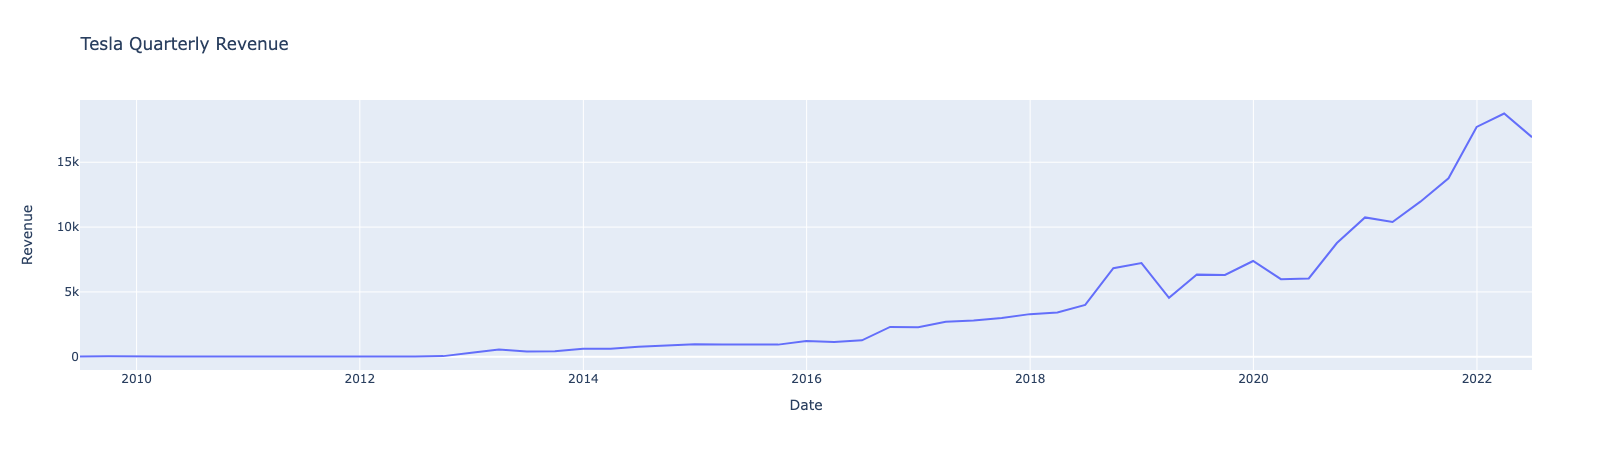

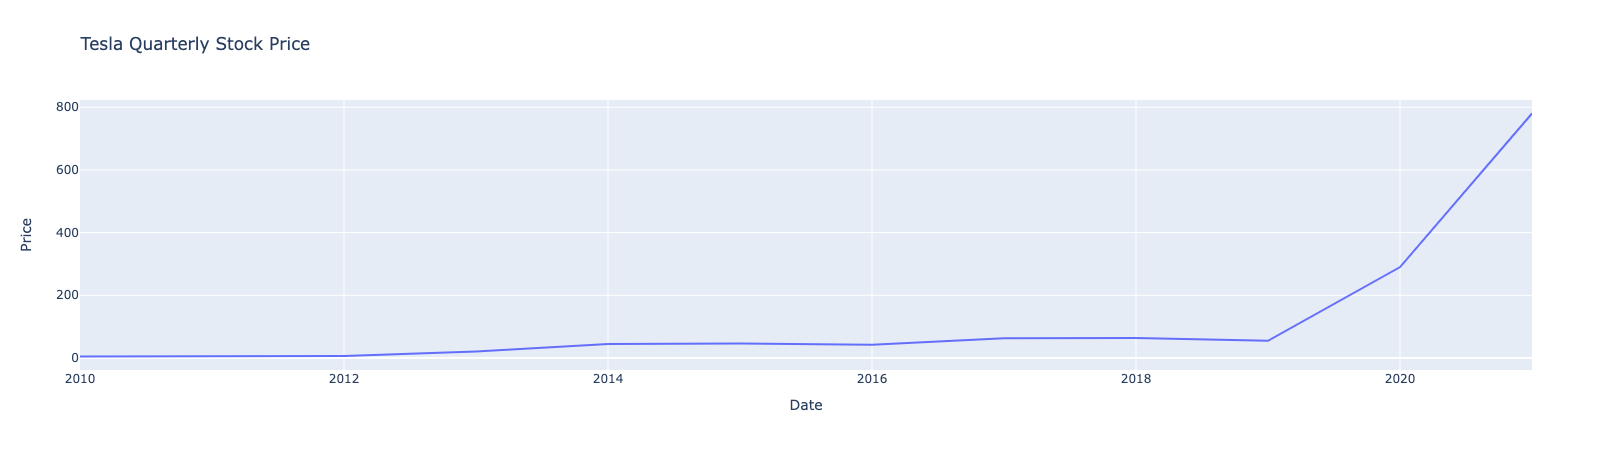

In [77]:
fig = px.line(dft, x="Date", y="Revenue", title='Tesla Quarterly Revenue')
fig.update_yaxes(categoryorder="category ascending")
fig.update_xaxes(fixedrange=True,categoryorder="category ascending")
fig.update_layout(autotypenumbers='convert types')
fig.show()

fig2 = px.line(dft3, x="Date", y="Price", title='Tesla Quarterly Stock Price')
fig2.update_yaxes(categoryorder="category ascending")
fig2.update_xaxes(fixedrange=True,categoryorder="category ascending")
fig2.update_layout(autotypenumbers='convert types')
fig2.show()

In [88]:
GS = yf.Ticker("GME")


In [89]:
GS_info=GS.info
GS_info

{'zip': '76051',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 12000,
 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its e-commerce properties and various stores in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, virtual reality products, and memory cards; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It also sells collectibles comprising licensed merchandise primarily related to the gaming, television, and movie industries, as well as pop culture themes. As of January 29, 2022, the company operated 4,573 stores and ecommerce sites under the GameStop, EB Games, and Micromania brands; and 50 pop culture themed stores that sell collectibles, apparel, gadgets, electronics, toys, and other retail products under the Zing Pop Culture brand, 

In [220]:
GS_share_price_data=GS.history(period="max")
GS_share_price_data.reset_index(inplace=True)


In [221]:
GS_share_price_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...,...
5141,2022-07-18,36.250000,37.400002,35.775002,36.660000,11155200,0.0,0.0
5142,2022-07-19,37.435001,39.209999,36.587502,37.924999,12828000,0.0,0.0
5143,2022-07-20,38.500000,40.407501,38.349998,39.687500,11400400,0.0,0.0
5144,2022-07-21,39.930000,40.000000,37.290001,38.367500,9277600,0.0,0.0


In [222]:
url2='https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
webdata2 = requests.get(url2).text

In [223]:
soup=BeautifulSoup(webdata2,"html.parser")

In [224]:
dfg=pd.DataFrame(columns=["Date","Revenue"])
tables2 = soup.find_all('table')
table_index2=0
for index2, table in enumerate(tables2):
    if ('Gamestop Quarterly Revenue' in str(table)):
        table_index2=index2
for row in tables2[table_index2].tbody.find_all('tr'):
    Col=row.find_all("td")
    if (Col!=[]):
        date=Col[0].text
        revenue=Col[1].text.replace("$","").replace(",","")
        dfg=dfg.append({'Date':date, 'Revenue':revenue},
        ignore_index=True)

In [225]:
dfg = dfg[dfg['Revenue']!='']

In [226]:
dfg

,Date,Revenue
0,2022,6011
1,2021,5090
2,2020,6466
3,2019,8285
4,2018,8547
5,2017,7965
6,2016,9364
7,2015,9296
8,2014,9040
9,2013,8887


In [240]:
url4='https://www.macrotrends.net/stocks/charts/GME/gamestop/stock-price-history'
webdata4 = requests.get(url4).text

In [241]:
soup4=BeautifulSoup(webdata4,"html.parser")

In [242]:
Line2_price_data=pd.DataFrame(columns=["Date","Price"])
tables4 = soup4.find_all('table')
table_index4=0
for index4, table in enumerate(tables4):
    if ('Gamestop Quarterly Revenue' in str(table)):
        table_index4=index4
for row in tables4[table_index4].tbody.find_all('tr'):
    Col=row.find_all("td")
    if (Col!=[]):
        date=Col[0].text
        price=Col[1].text.replace("$","").replace(",","")
        Line2_price_data=Line2_price_data.append({'Date':date, 'Price':price},
        ignore_index=True)

In [243]:
Line2_price_data = Line2_price_data[Line2_price_data['Price']!='']

In [244]:
Line2_price_data

,Date,Price
0,2021,42.4267
1,2020,1.7854
2,2019,1.8871
3,2018,3.7044
4,2017,5.3938
5,2016,6.9921
6,2015,10.1194
7,2014,9.9284
8,2013,10.0116
9,2012,5.4529


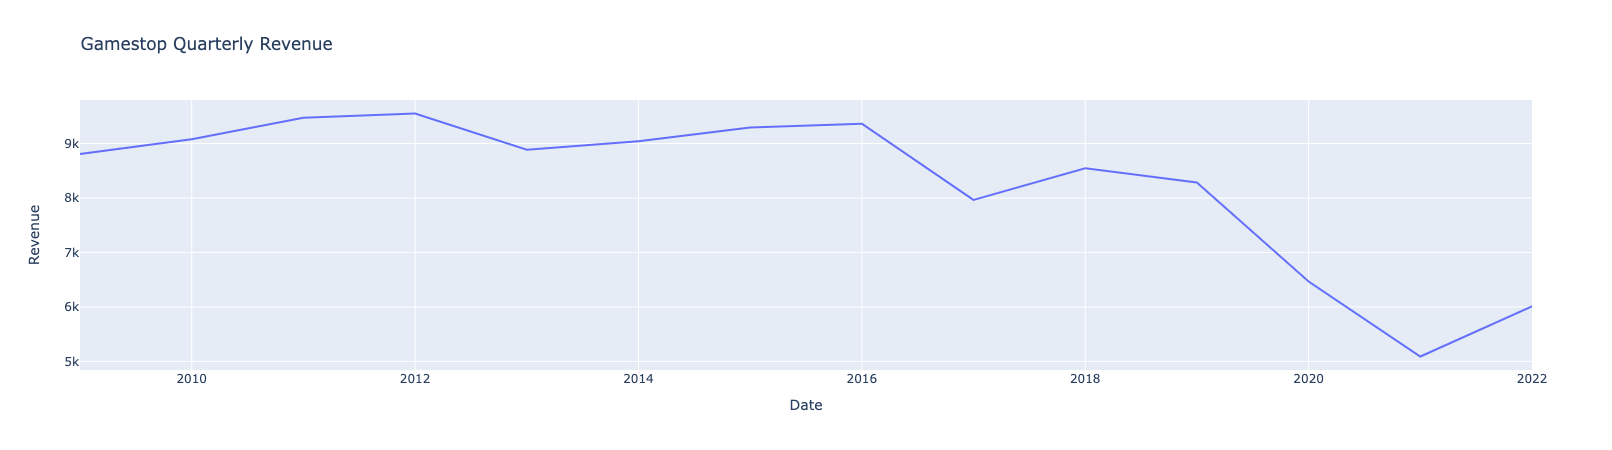

In [259]:
fig3 = px.line(dfg, x="Date", y="Revenue", title='Gamestop Quarterly Revenue')
fig3.update_yaxes(categoryorder="category ascending")
fig3.update_xaxes(fixedrange=True,categoryorder="category ascending")
fig3.update_layout(autotypenumbers='convert types')
fig3.show()

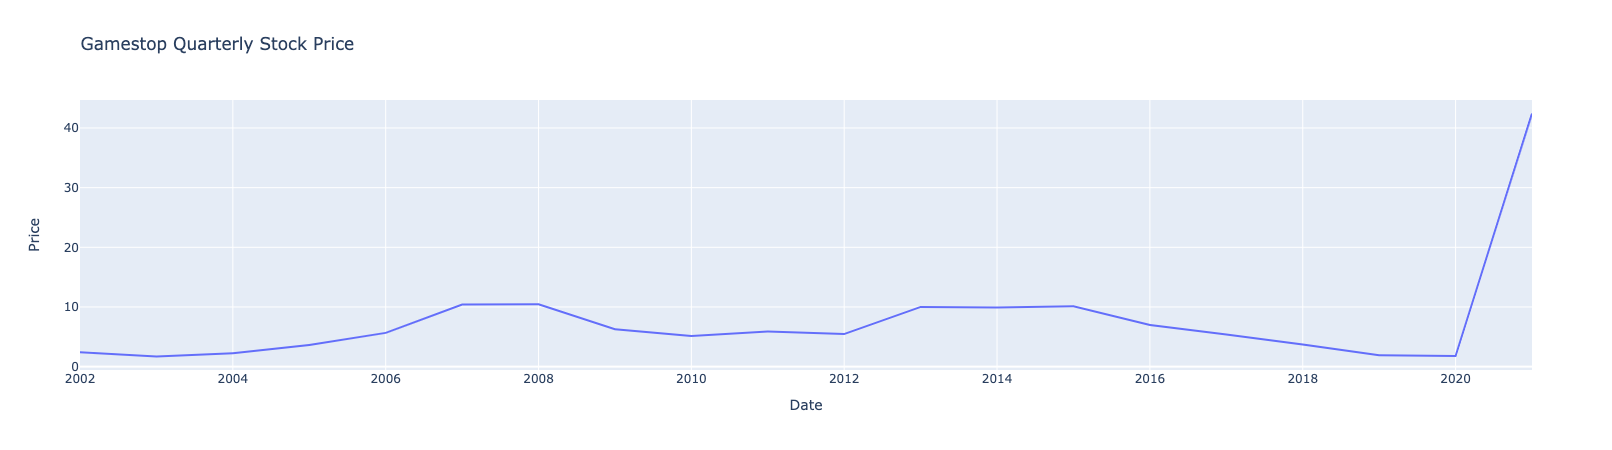

In [255]:
fig4 = px.line(Line2_price_data, x="Date", y="Price", title='Gamestop Quarterly Stock Price')
fig4.update_yaxes(categoryorder="category ascending")
fig4.update_xaxes(fixedrange=True,categoryorder="category ascending")
fig4.update_layout(autotypenumbers='convert types')
fig4.show()